# CLEAR-IT Figure S36

Here, we generate the plots shown in Figure S36.

First, let's load the required modules.

In [3]:
import glob
import pandas as pd
from pathlib import Path
from clearit.config import OUTPUTS_DIR
from clearit.plotting.boxplot import boxplot_performance
from clearit.metrics.gather_metric import gather_metric
from clearit.io.discover_entries import discover_entries

## Figure S36a
a) shows the micro-average F1-scores for 4-layer MLPs predicting cell classes in the CRC-CODEX26 dataset with CellSighter_MC14 labels. The MLPs receive three different inputs:
1. Features generated by a CLEAR-IT encoder pre-trained on this dataset (blue)
2. Cell expressions and cell sizes computed using the segmentation masks from Mesmer (red)
3. The concatenation of the previous feature sets (yellow)

Let's first define the path of the results and build a list of the individual entries for the label reduction.

In [ ]:
# build entries
tests_dir = Path(OUTPUTS_DIR,"maps_benchmark","CRC-CODEX26","labelreduction_with_sampling")
scenarios = {
    "features":      Path(tests_dir,"features"),
    "expressions":            Path(tests_dir,"expressions"),
    "features_expressions":    Path(tests_dir,"features_expressions"),
}
entries = discover_entries(scenarios)

# define mapping for nicer strings in plot legend
label_map = {
    "features": "CLEAR-IT features",
    "expressions": "Cell expressions",
    "features_expressions": "CLEAR-IT features \n+ cell expressions"
}

Next, we gather the results from the detected entries and compute the micro-average F1-scores of the test set in the dataframe `df_a_f1`.

In [6]:
# gather F1‐scores (micro average) per folder
df_a_f1 = gather_metric(entries, metric="f1", average="micro")
# enforce group ordering in dataframe
group_order = pd.api.types.CategoricalDtype(categories=["features","expressions","features_expressions"], ordered=True)
df_a_f1["Group"] = df_a_f1["Group"].astype(group_order)
df_a_f1 = df_a_f1.sort_values("Group")

Finally, we use the dataframe to generate the plot. The function also outputs `df_a_out` which contains the median values of the boxes.

,features,expressions,features_expressions
Configuration,,,
28,0.825532,0.758492,0.841945
23,0.819557,0.754971,0.841498
18,0.811152,0.756434,0.833986
12,0.799177,0.754822,0.827962
7,0.780161,0.743839,0.803888
4,0.738186,0.744012,0.768483
2,0.666113,0.713914,0.705435
1,0.569470,0.647841,0.614519


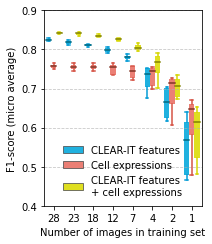

In [7]:
# now pass directly into boxplot_performance:
ax, df_a_out = boxplot_performance(
    df_a_f1,
    value_col="Value",
    group_col="Group",
    order=sorted(df_a_f1["Configuration"].unique())[::-1],
    show_mean_of_medians=False,
    show_total=False,
    label_map=label_map,
    ylim=[0.4,.9],
    figsize=(3,3.5),
    ylabel="F1-score (micro average)",
    xlabel="Number of images in training set",
    legend_loc="lower center",
    legend_ncol=1,
)

# display the resulting dataframe
display(df_a_out)

# save plot
fig = ax.get_figure()
fig.savefig("S36a.svg", format="svg")

## Figure S36b
b) shows the micro-average F1-scores for 4-layer MLPs predicting cell classes in the TONSIL-IMC41 dataset with OPTIMAL_MC21 labels. The MLPs receive three different inputs:
1. Features generated by a CLEAR-IT encoder pre-trained on this dataset (blue)
2. Cell expressions and cell sizes computed using the segmentation masks from OPTIMAL (red)
3. The concatenation of the previous feature sets (yellow)

Let's first define the path of the results and build a list of the individual entries for the label reduction.

In [11]:
# build entries
tests_dir = Path(OUTPUTS_DIR,"maps_benchmark","TONSIL-IMC41","labelreduction_with_sampling")
scenarios = {
    "features":      Path(tests_dir,"features"),
    "expressions":            Path(tests_dir,"expressions"),
    "features_expressions":    Path(tests_dir,"features_expressions"),
}
# define mapping for nicer strings in plot legend
label_map = {
    "features": "CLEAR-IT features",
    "expressions": "Cell expressions",
    "features_expressions": "CLEAR-IT features \n+ cell expressions"
}

entries = discover_entries(scenarios)

Next, we gather the results from the detected entries and compute the micro-average F1-scores across 50 splits of the test set in the dataframe `df_b_f1`.

In [12]:
# gather F1‐scores (micro average) per folder
df_b_f1 = gather_metric(entries, metric="f1", average="micro")
# enforce group ordering in dataframe
group_order = pd.api.types.CategoricalDtype(categories=["features","expressions","features_expressions"], ordered=True)
df_b_f1["Group"] = df_b_f1["Group"].astype(group_order)
df_b_f1 = df_b_f1.sort_values("Group")

Finally, we use the dataframe to generate the plot. The function also outputs `df_b_out` which contains the median values of the boxes.

,features,expressions,features_expressions
Configuration,,,
17,0.499838,0.556246,0.593644
14,0.474538,0.538274,0.564315
11,0.478068,0.551382,0.566902
7,0.450005,0.540200,0.530191
4,0.405346,0.557499,0.485450
2,0.351107,0.493426,0.397721
1,0.239034,0.481503,0.253880


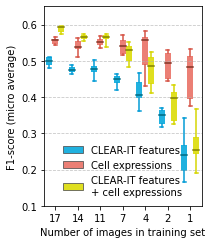

In [13]:
# now pass directly into boxplot_performance:
ax, df_b_out = boxplot_performance(
    df_b_f1,
    value_col="Value",
    group_col="Group",
    order=sorted(df_b_f1["Configuration"].unique())[::-1],
    show_mean_of_medians=False,
    show_total=False,
    label_map=label_map,
    ylim=[0.1,.65],
    figsize=(3,3.5),
    ylabel="F1-score (micro average)",
    xlabel="Number of images in training set",
    legend_loc="lower center",
    legend_ncol=1,
)

# display the resulting dataframe
display(df_b_out)

# save plot
fig = ax.get_figure()
fig.savefig("S36b.svg", format="svg")
